In [56]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_trials_info import *

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\mice\\cohort3"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/mice/cohort3"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R621", "R622", "R623", "R624"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
# date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=1)
few_days_ago = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [58]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-09-07 14:56:01,171][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 19 sessions for R621 between 2023-08-18 and 2023-09-07
fetched 19 sessions for R622 between 2023-08-18 and 2023-09-07
fetched 20 sessions for R623 between 2023-08-18 and 2023-09-07
fetched 21 sessions for R624 between 2023-08-18 and 2023-09-07


In [59]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R624_2023-09-07_day_summary


In [60]:
date_max_dt = trials_df["date"].max()
trials_df.query("date == @today").groupby("animal_id").give_type_imp.unique()

animal_id
R621           [water_and_light]
R622               [none, light]
R623    [light, water_and_light]
R624                     [light]
Name: give_type_imp, dtype: object

In [61]:
trials_df.query("date == @today").groupby("animal_id").water_delivered.sum() / 1000

animal_id
R621    0.6512
R622    0.1530
R623    0.9414
R624    0.7800
Name: water_delivered, dtype: float64

In [62]:
trials_df.query("date == @today").groupby("animal_id").stage.max()

animal_id
R621    9.0
R622    9.0
R623    9.0
R624    8.0
Name: stage, dtype: float64

In [63]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [64]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )

f_name = "R62s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)

days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-08-18 -> 2023-09-07
Returning appended df with entries between 2023-08-18 and 2023-09-07
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R62s_days_df.csv


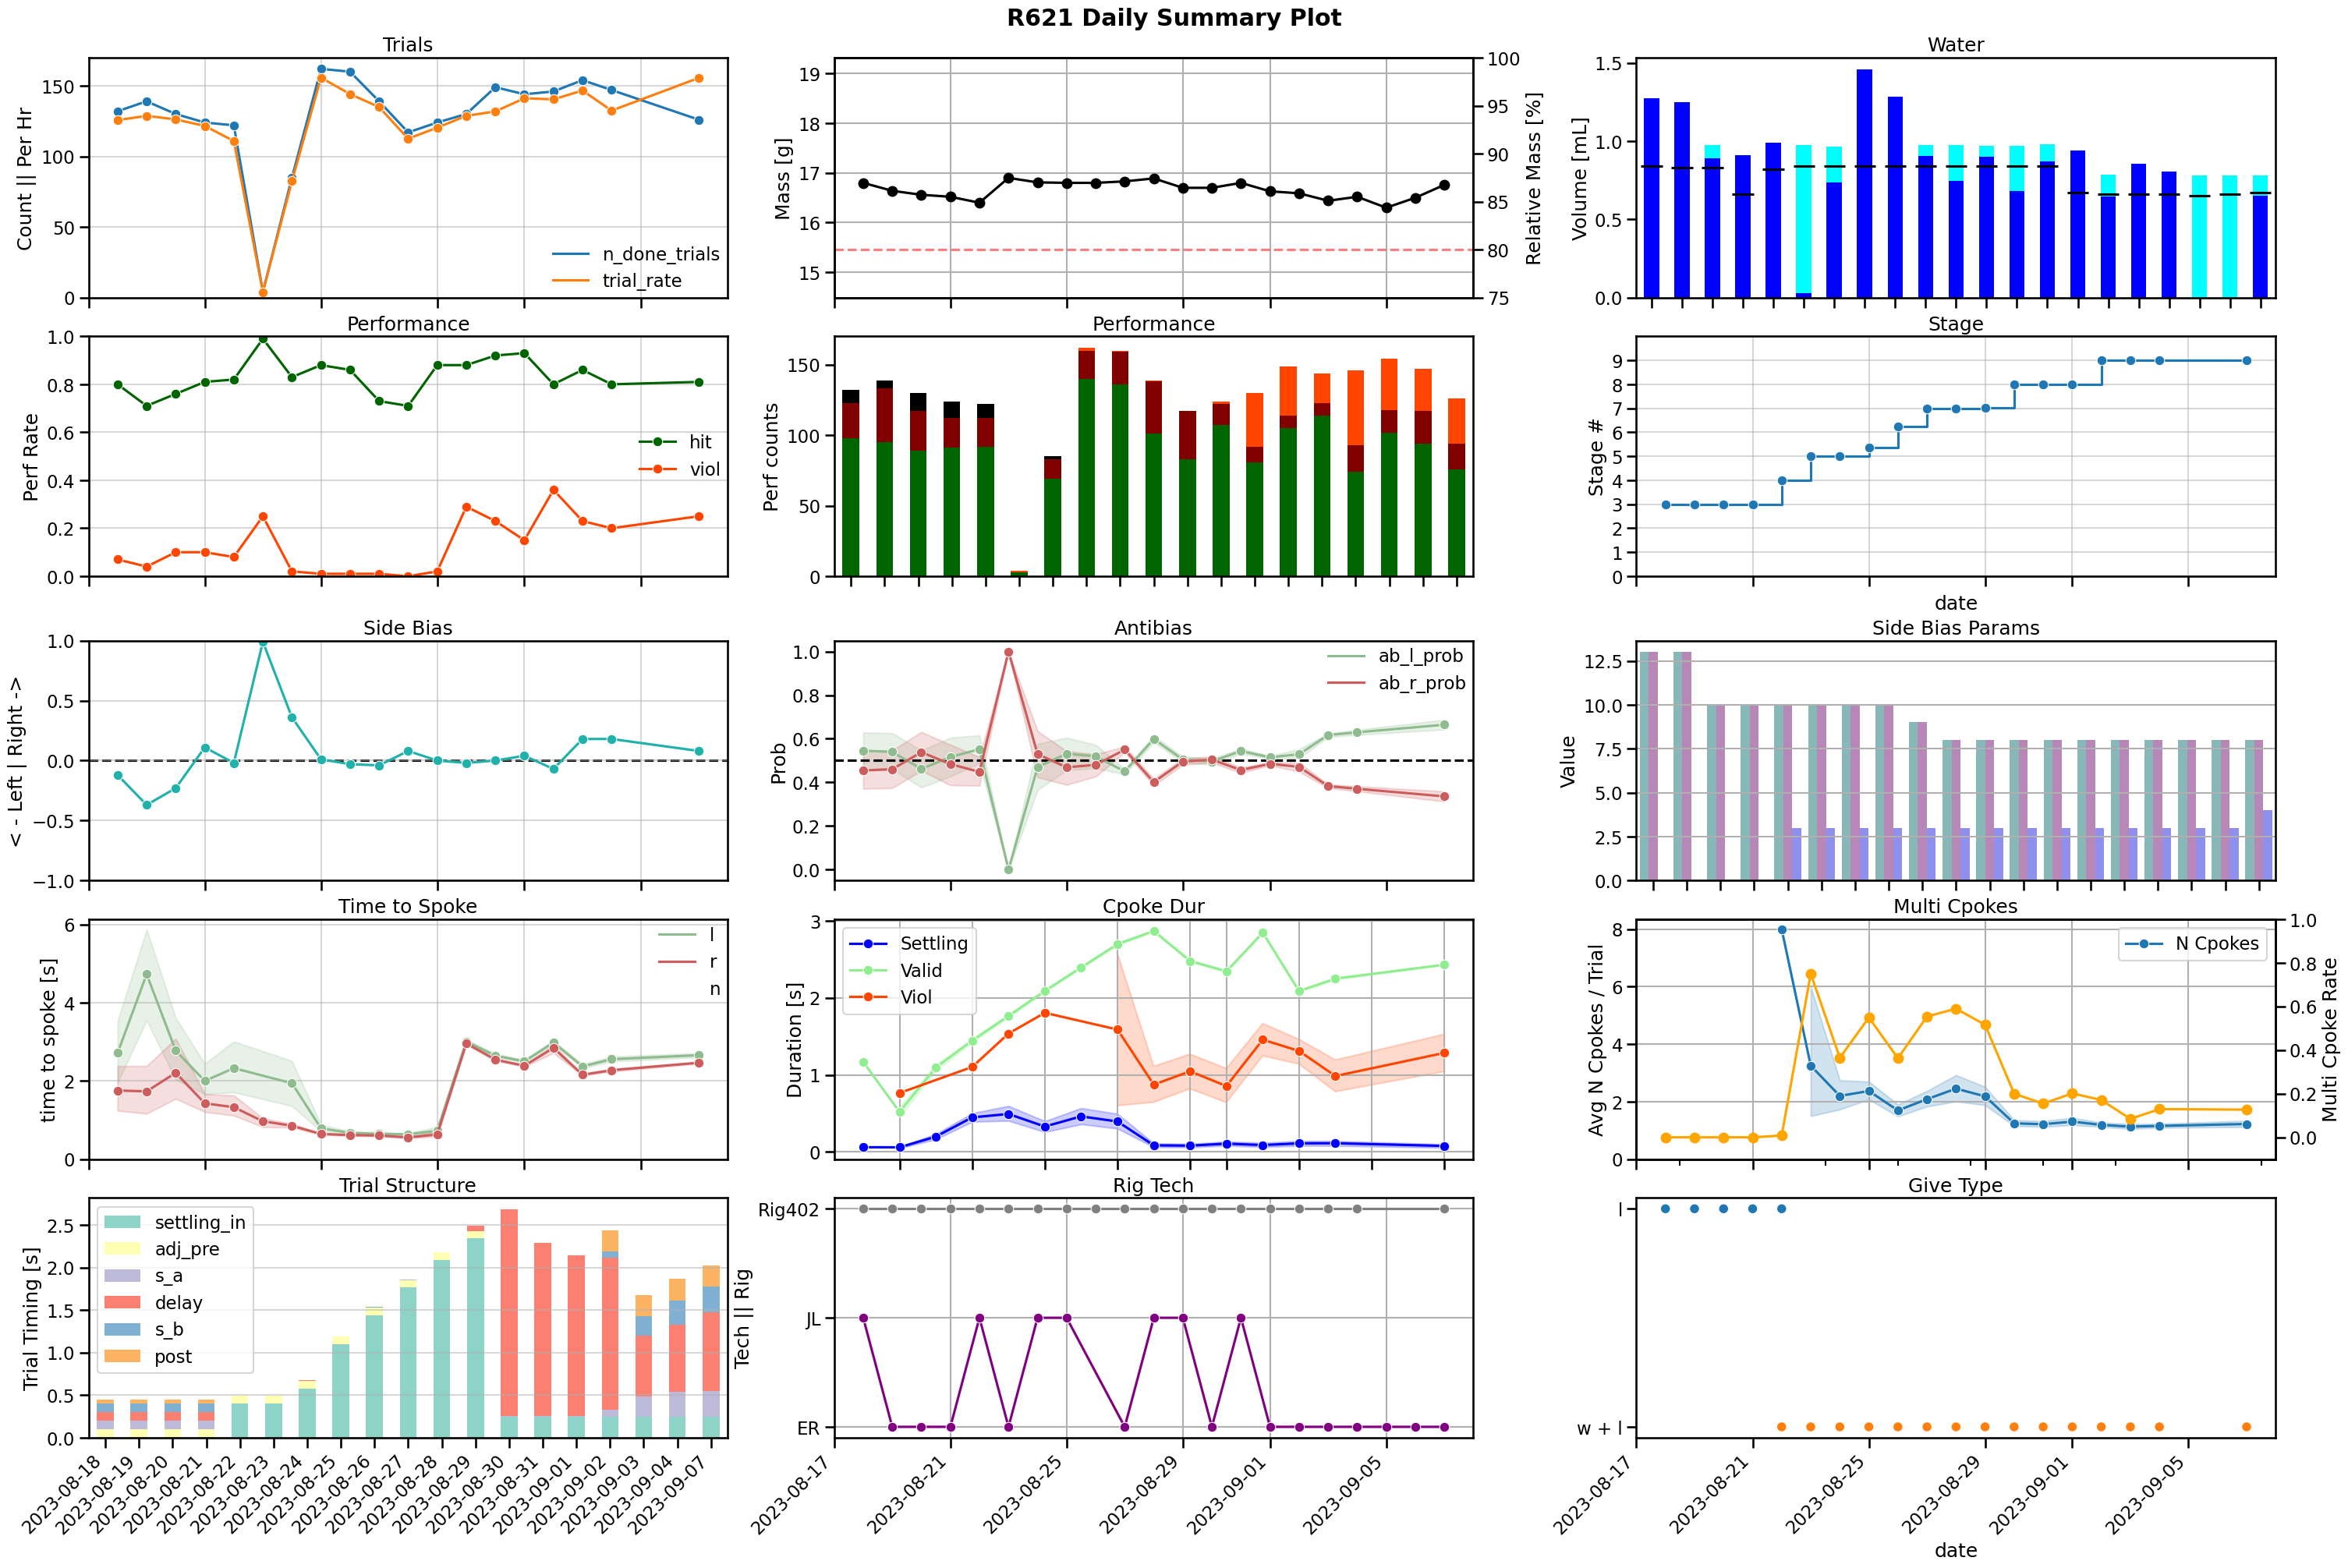

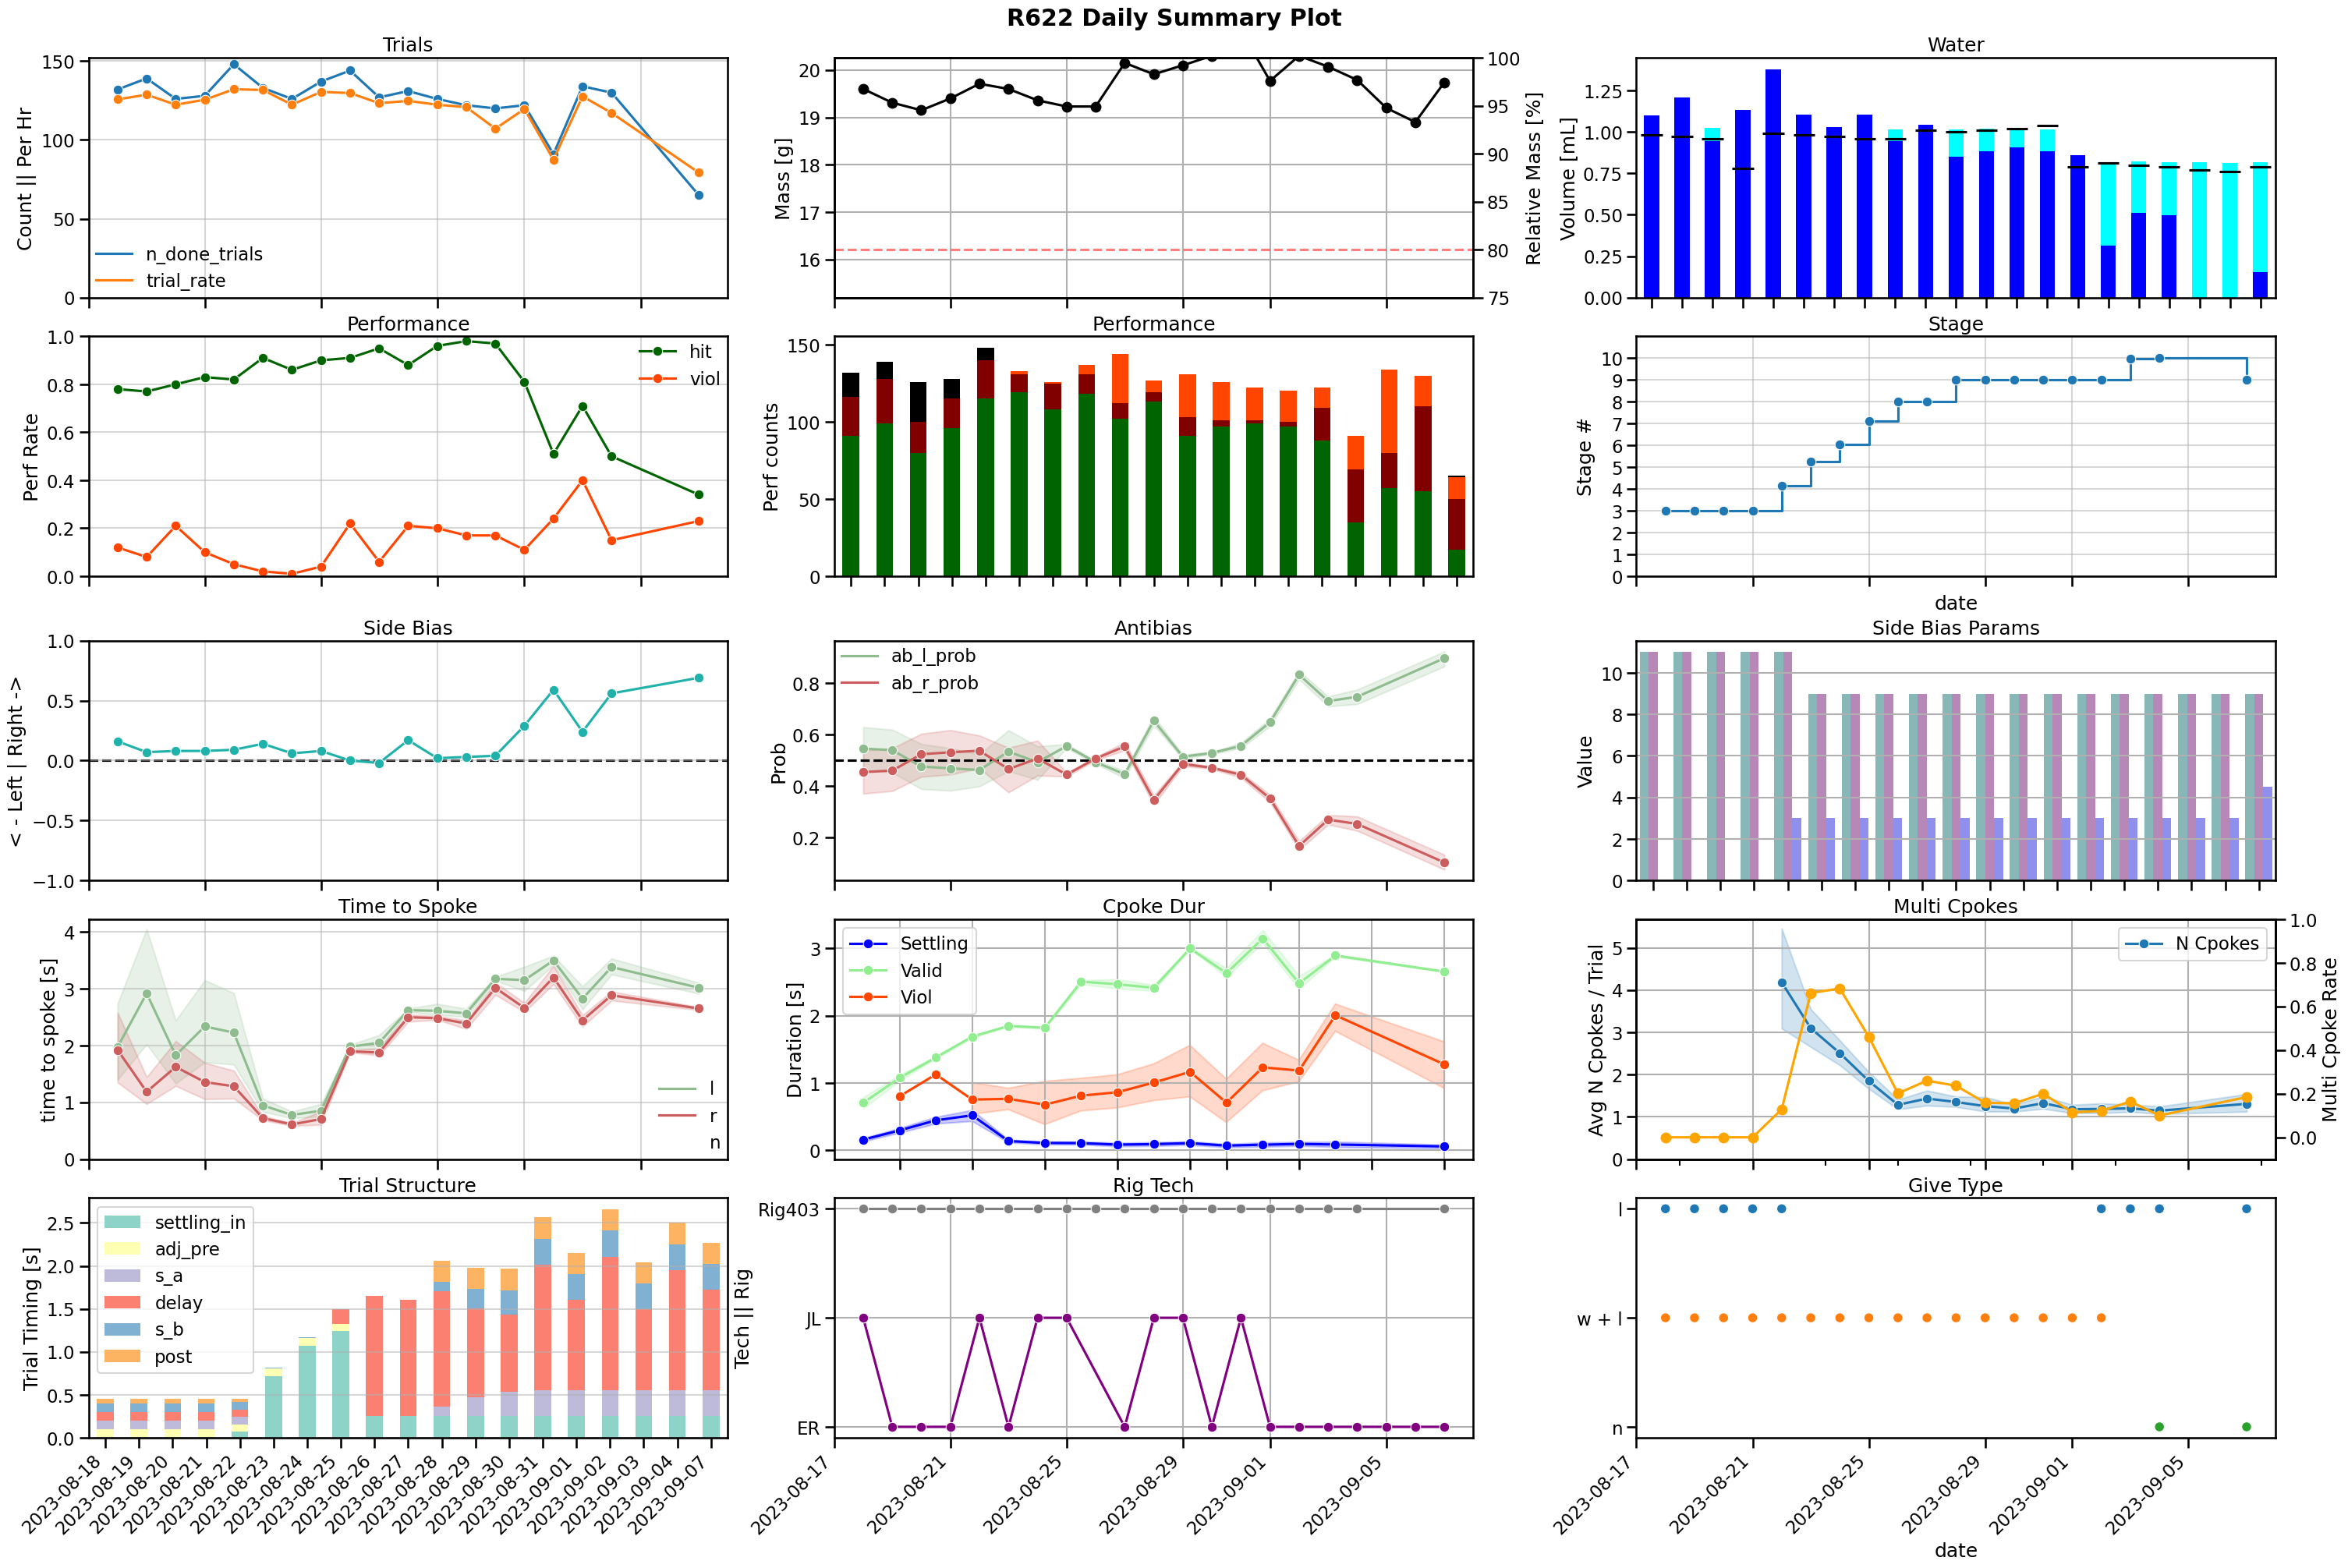

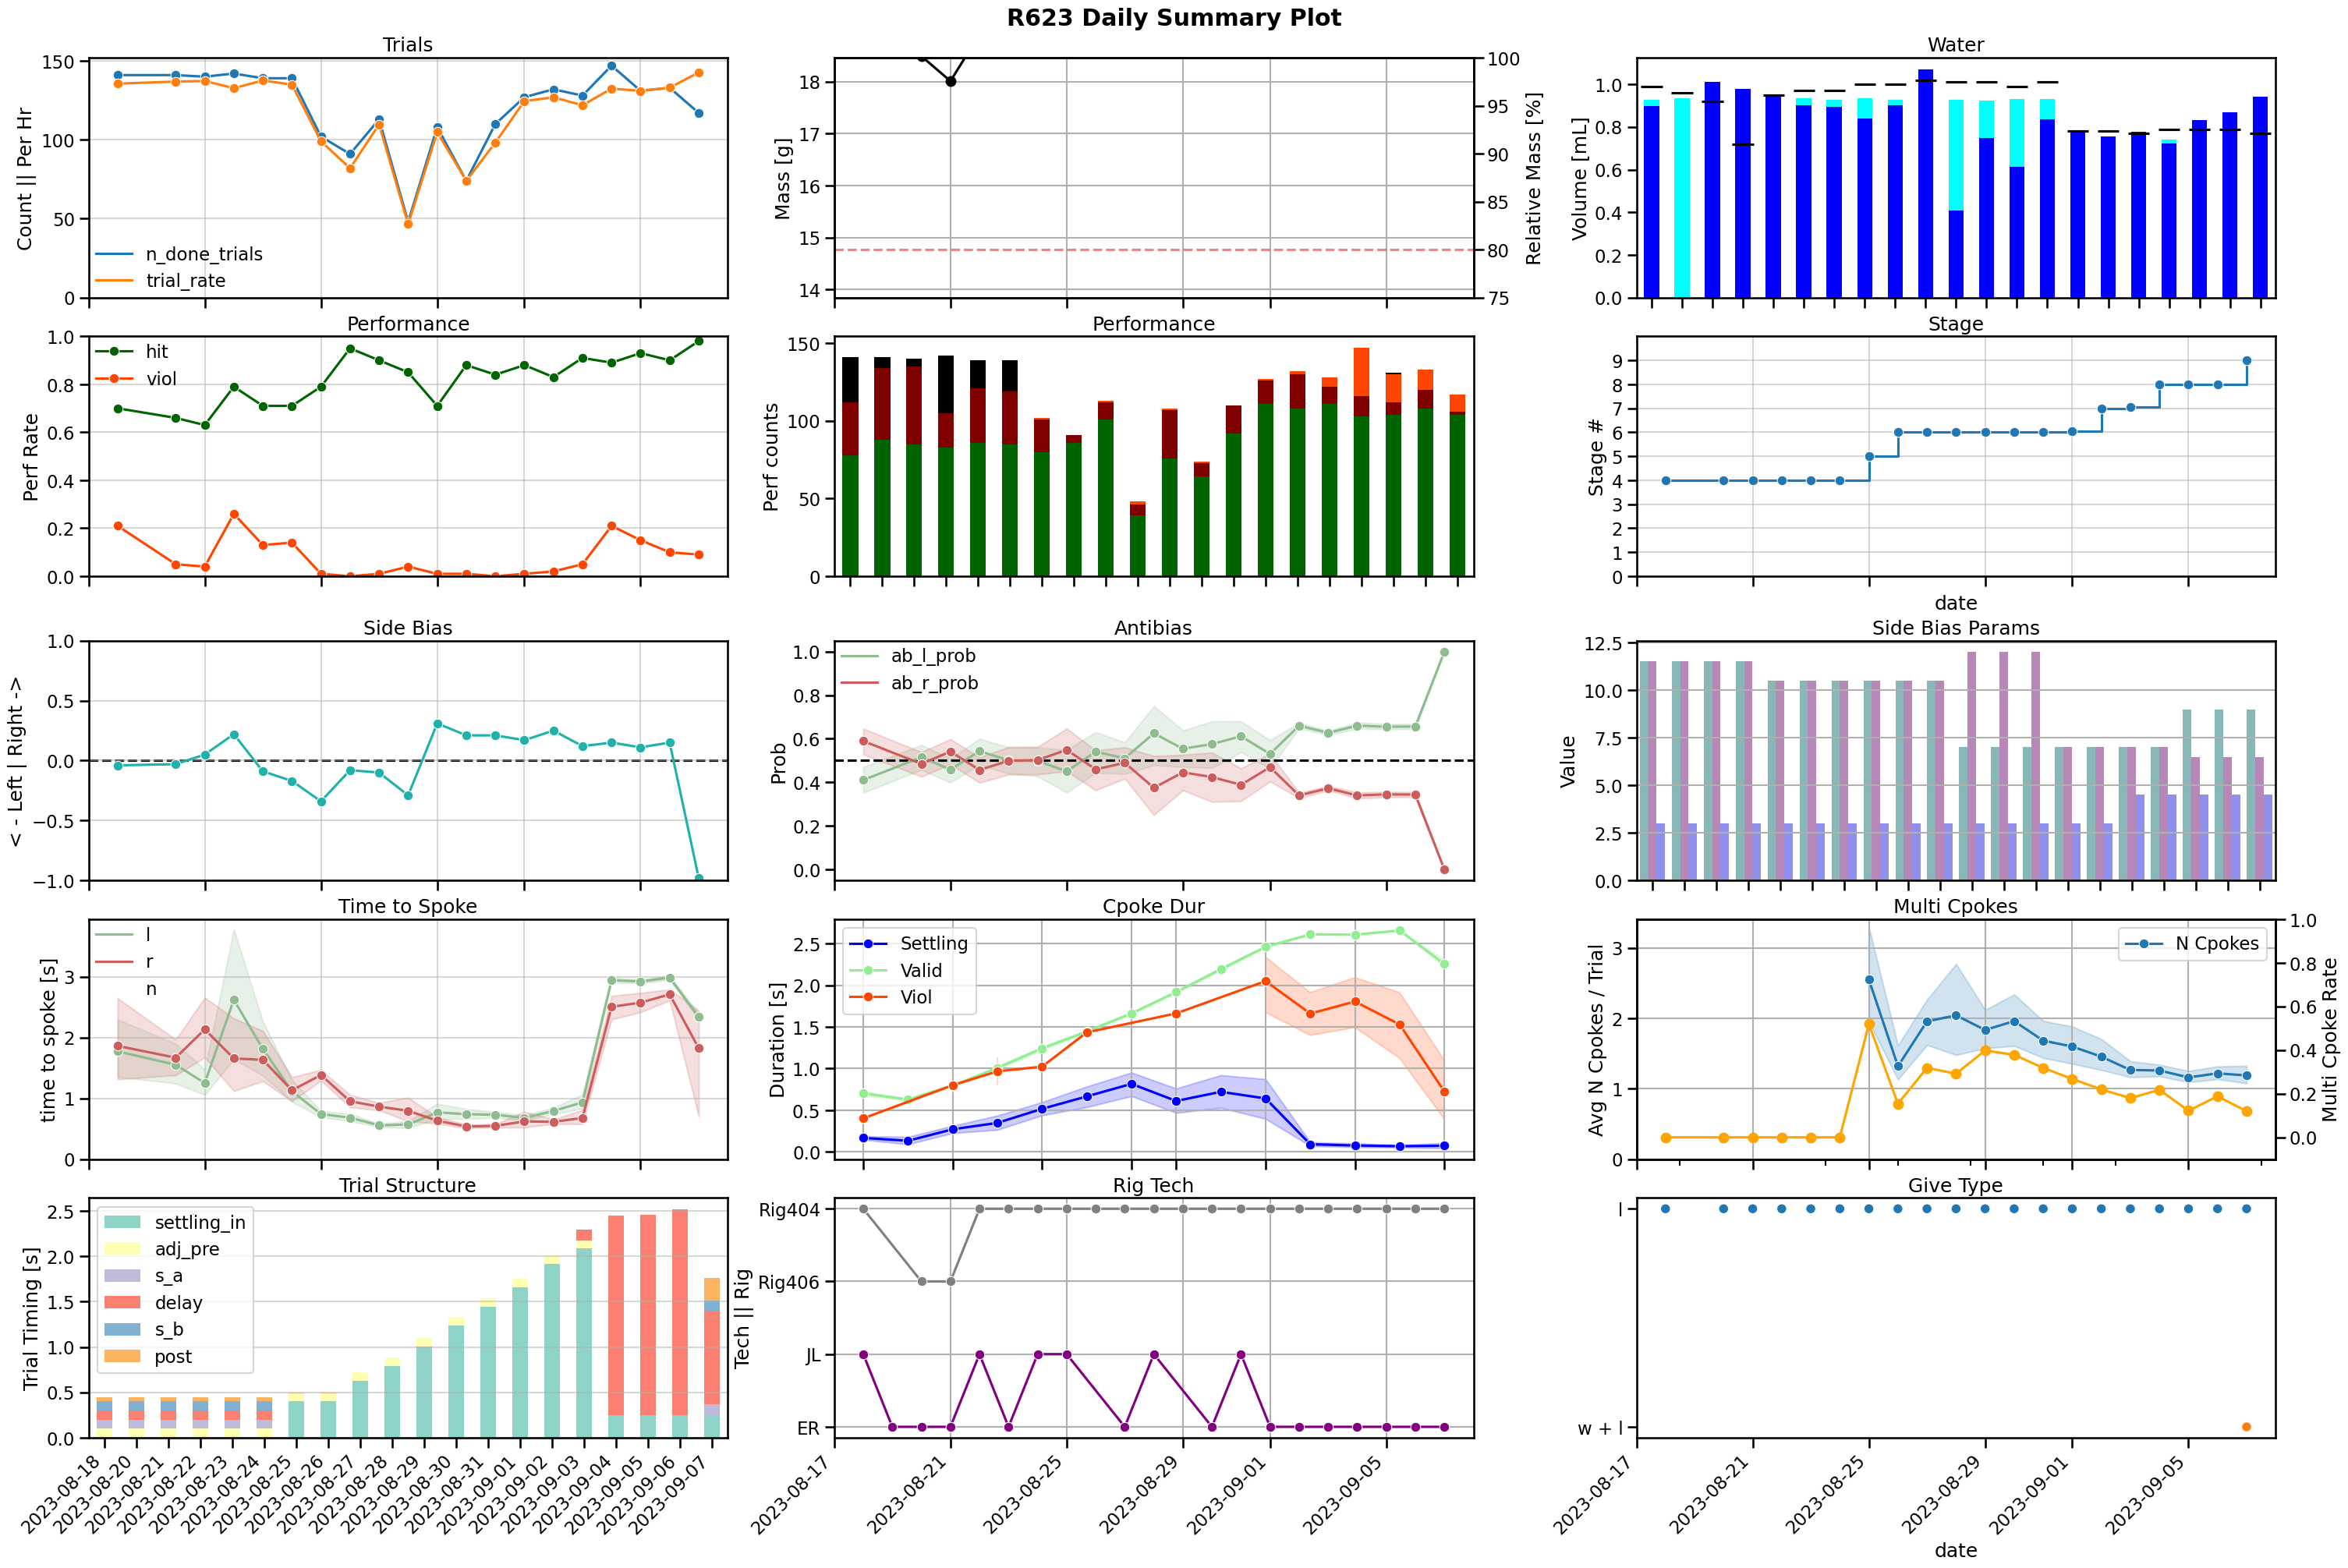

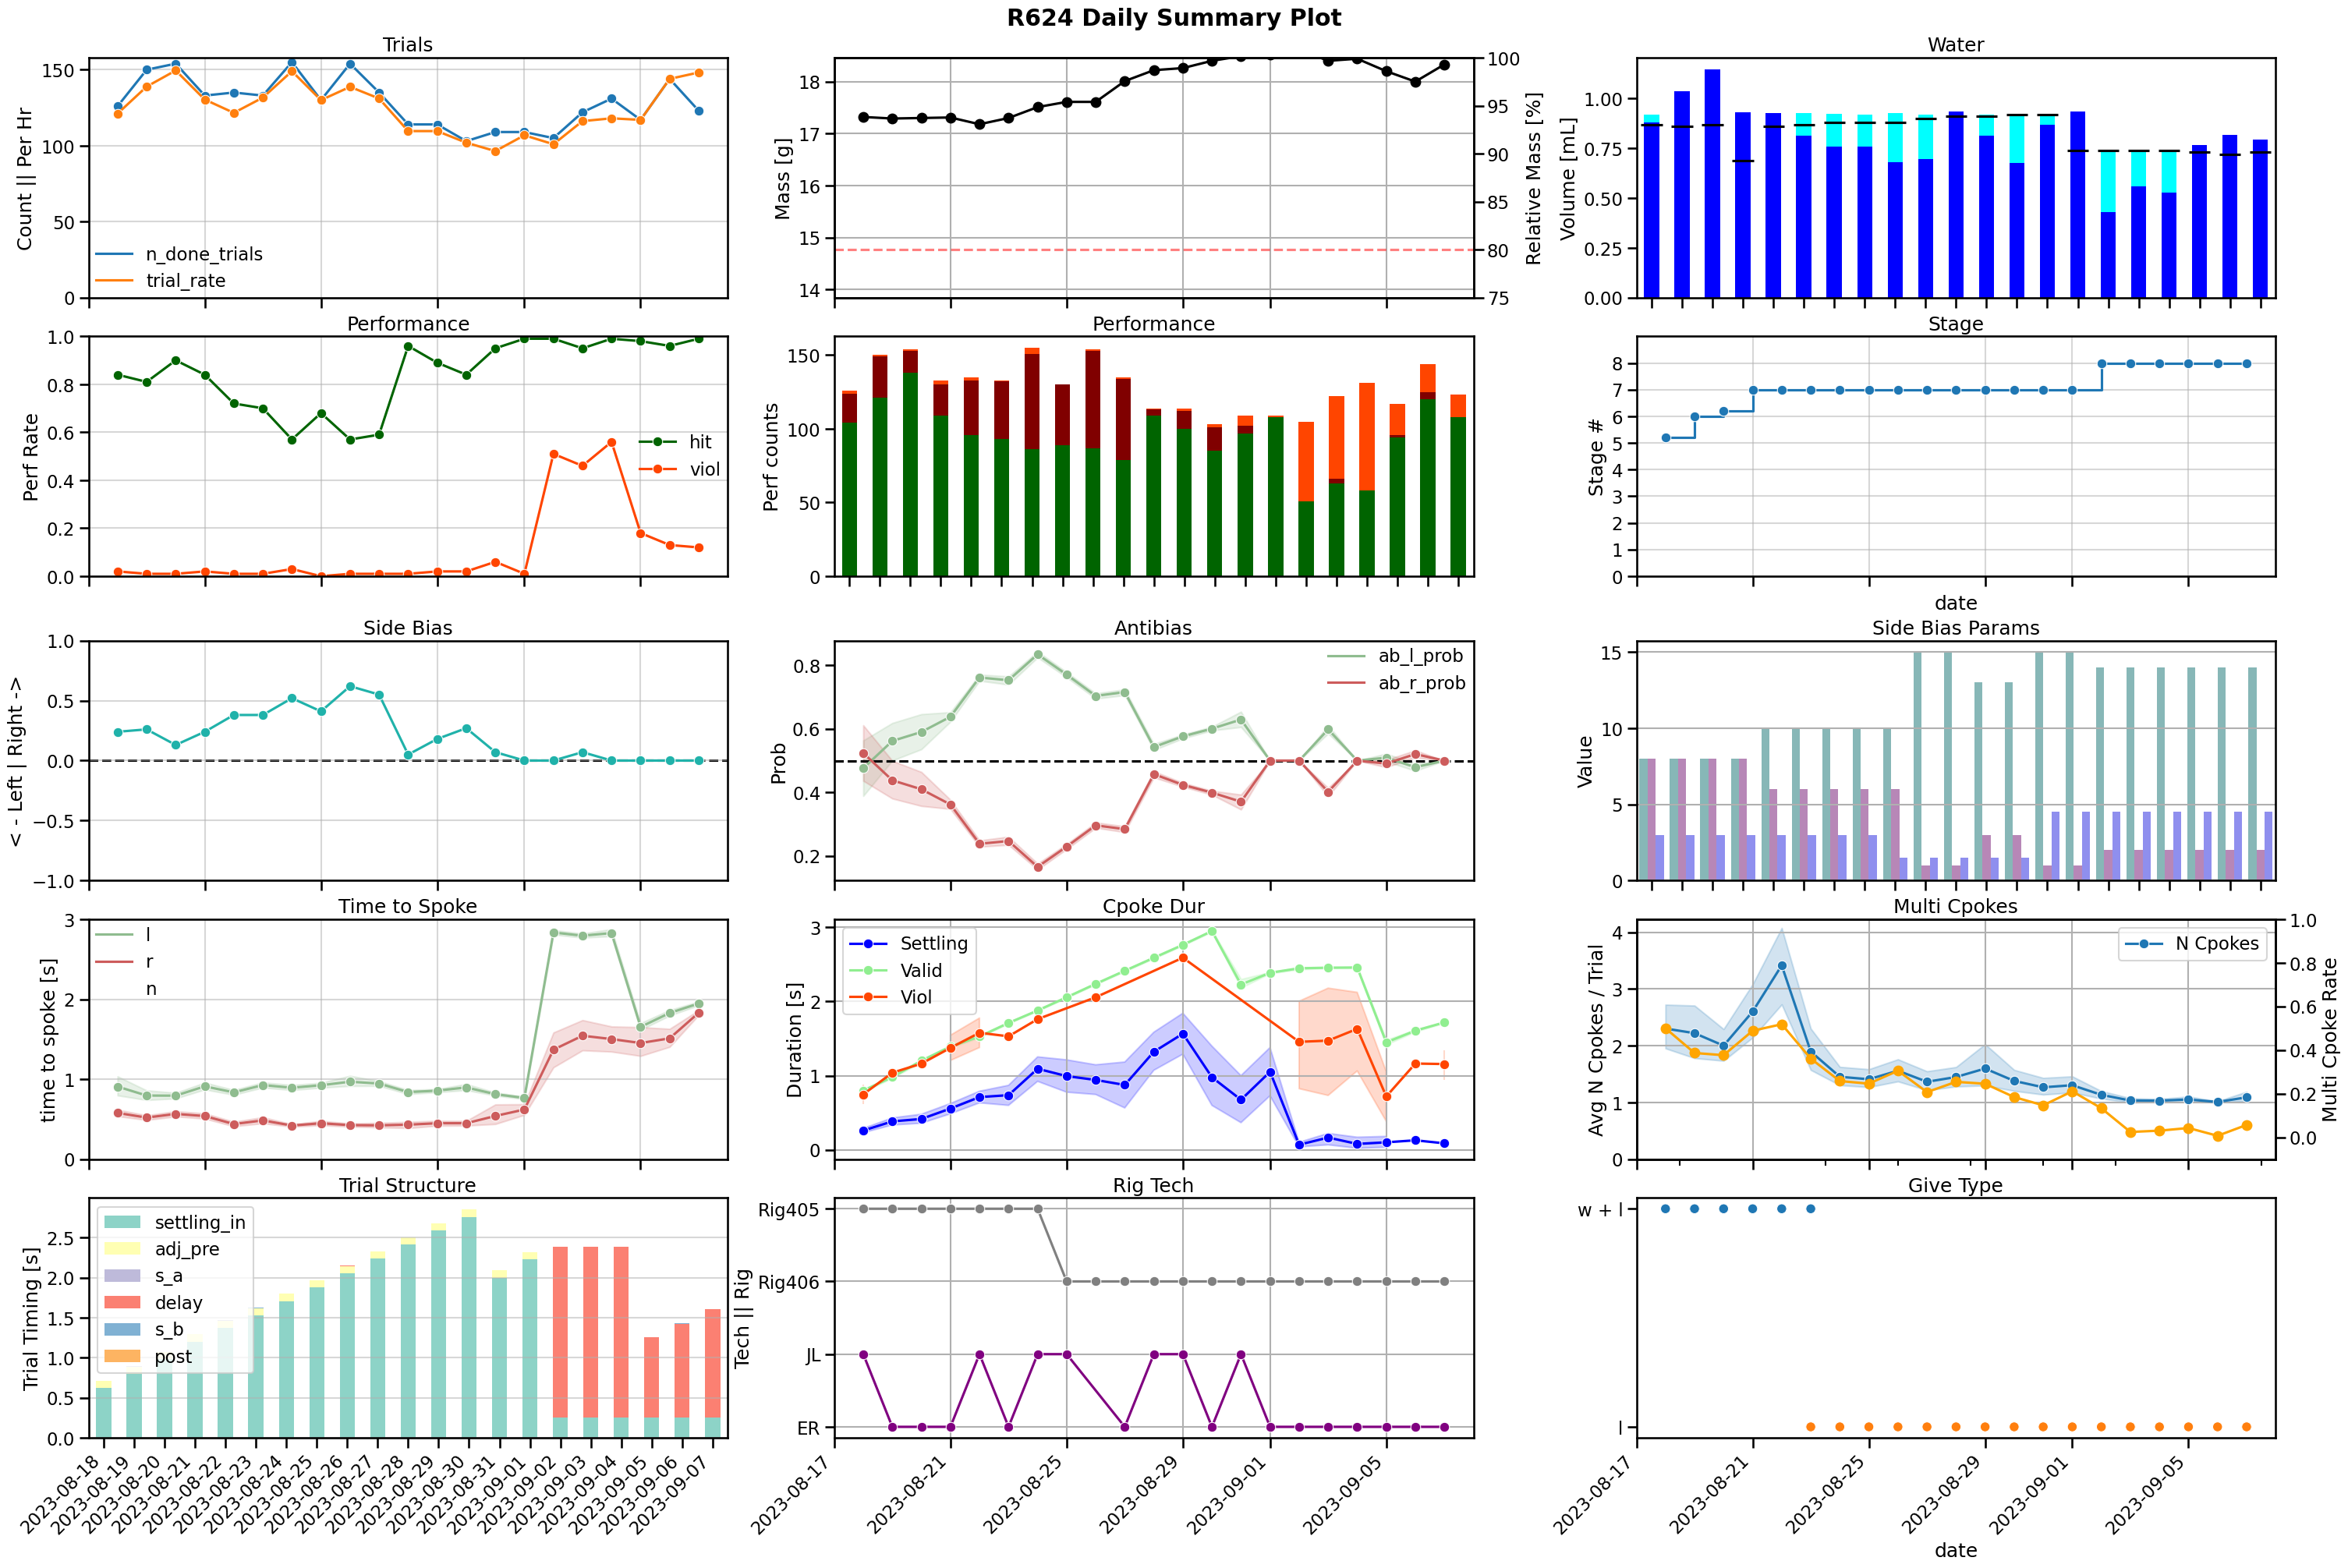

In [65]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)